<div style="text-align: right">Created by: Goutham Kumar R <br/>Notebook created on: 04th November 2020</div>

# Intro to Linear Algebra 

### Libraries

In [334]:
import numpy as np
import math
import scipy as sp
import sympy 
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Linear algebra (part 1)

### Linear combiantion: 

In [2]:
#defining vectors
v = np.array([1,1])

u = np.array([-2,2]) 

print("vector : v", v)
print("vector : u", u)

#vector addition
z = v + u
print("Vector adddtion z = v + u\nz : ", z)

vector : v [1 1]
vector : u [-2  2]
Vector adddtion z = v + u
z :  [-1  3]


(-5.0, 5.0)

(-5.0, 5.0)

Text(0.5, 1.0, 'Vectors in space')

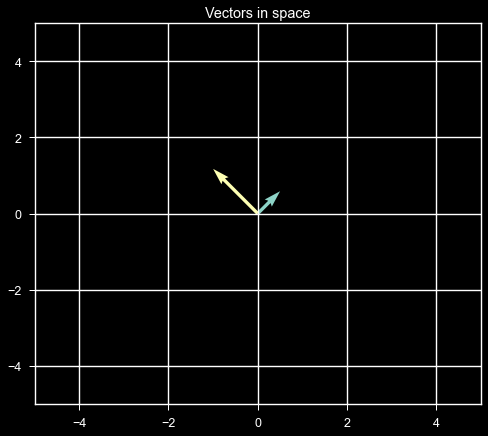

(-5.0, 5.0)

(-5.0, 5.0)

Vector addition result : z [-1  3]


Text(0.5, 1.0, 'Vector addition')

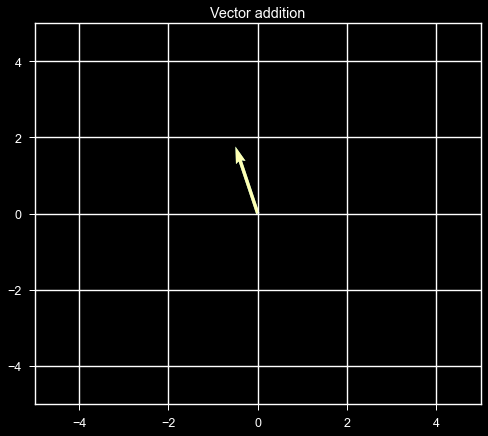

In [336]:

#plotting
V = np.array([[1,1], [-2,2]]) #vector v and u combined for plotting
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1],color=sns.color_palette() , scale=20)
plt.xlim(-5, 5) #axis
plt.ylim(-5, 5)
plt.title("Vectors in space")
plt.grid()
plt.show()
z1 = V[0] + V[1] # adding up the 1st (red) and 2nd (blue) vectors
plt.quiver(*origin, z1[0], z1[1],color=sns.color_palette(), scale=20)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
print("Vector addition result : z",z)
plt.title("Vector addition")
plt.grid()
plt.show()

In [9]:
#scalar multiplication
c,d = 3, 5
scal_v = 3*V[0] 
scal_u = 2*V[1]
print("vector : v", v)
print("vector : u", u)
print("\nscaled v:",scal_v,"\nScaled u:", scal_u)


vector : v [1 1]
vector : u [-2  2]

scaled v: [3 3] 
Scaled u: [-4  4]


Text(0.5, 1.0, 'Inital Vectors in space')

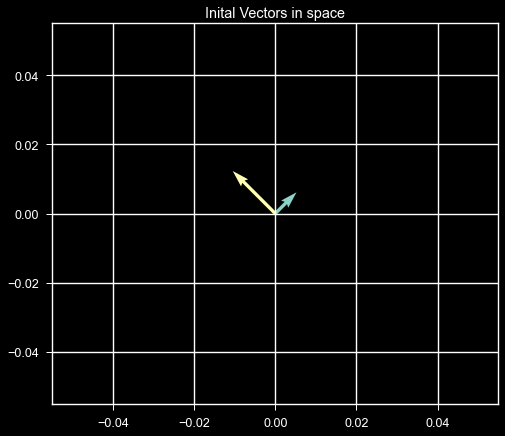

Text(0.5, 1.0, 'Scaled Vectors in space')

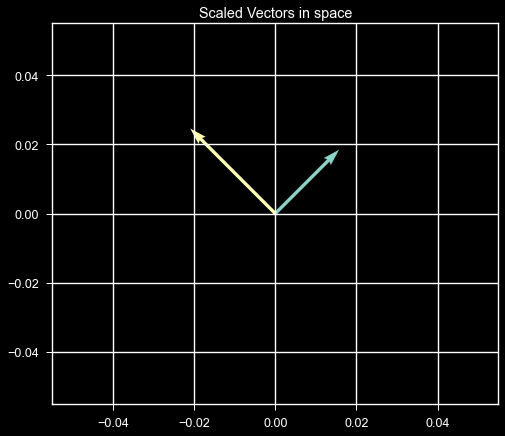

In [337]:

#plotting
V = np.array([[1,1], [-2,2]]) #vector v and u combined for plotting
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=sns.color_palette(), scale=21)
# plt.xlim(-5, 5) #axis
# plt.ylim(-5, 5)
plt.title("Inital Vectors in space")
plt.grid()
plt.show()

S_V = np.array([[3,3], [-4,4]]) #scaled vector

plt.quiver(*origin, S_V[:,0], S_V[:,1], color=sns.color_palette(), scale=21)
# plt.xlim(-20, 20) #axis
# plt.ylim(-20, 20)
plt.title("Scaled Vectors in space")
plt.grid()
plt.show()

Linear combiantion: 

scalar multiplication and vector addition


In [13]:
#defining vectors
v = np.array([1,1])

w = np.array([2,3])

V = np.array([[1,1], [2,3]])

#scalars 
c, d = 3 , 5

#linear combination
L = c*V[0] + d*V[1]

print("Linear combination L is c*u + dw :\n",L)

Linear combination L is c*u + dw :
 [13 18]


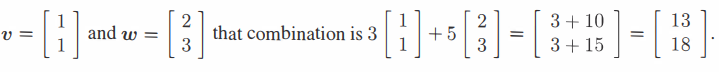

### System of Linear equations:

#### Consistency check:

If |A| !=0, then consistent and unique solutions<br/>

If |A|=0 i.e, matrix is singular and check <br/>
(Adj A) B = 0, then consistent and has infinite solutions <br/>
(Adj A) B != 0, then inconsistent 


In [93]:
def consistency(A, B):
    """Consistency check for the given system of equations
        param: matrices
        return: Consitent or not."""
    d = np.linalg.det(A)
    if d != 0: #|A| !=0
        print("\nDeterminant is:", np.round(d,0),"\nThe system of equations is consistent and unique solution exists.")
    else: #|A| =0
        print("Singular Matrix, detetminant is zero")
        adjA = sympy.Matrix(A).adjugate()
        m,n = B.shape
        if (adjA)*(B) == sympy.Matrix(np.zeros(n)):  # (Adj A) B = 0,
            print("\nThe system is consistent and has infinite solutions.")
            
        else: #(Adj A) B != 0
            print("\nThe system of equations is inconsistent")


Given a System of Equations : Represent those in matrix form

Problem 1:

5x + 7y = 1   
2x – 3y = 3

In [90]:
A = np.mat('5,7;2,-3')
B = np.mat('1;3')
consistency(A, B)


Determinant is: -29.0 
The system of equations is consistent and unique solution exists.


Problem 2:

2x - 3y = 5<br/>
4x - 6y = 10

In [91]:
A = np.mat('2,-3;4,-6')
B = np.mat('5;10')

consistency(A,B)

Singular Matrix, detetminant is zero

The system of equations is inconsistent


### Solving system of linear equations:

There are four methods:
 * REF
 * RREF
 * Matrix Inversion
 * Determinant (Cramer's Rule)

Problem 3: Solve <br/>

2x + y + z = 1        
x + 2y – z = 8        
3x – 2y + 2z = -7

In [139]:
A = np.mat('2,1,1;1,2,-1;3,-2,2')
B = np.mat('1;8;-7')

AB = np.mat("2,1,1,1;1,2,-1,8;3,-2,2,-7") #augmented matrix
print("Matrix :A\n",A)
print("\nMatrix :B\n",B)
print("\n\nAugmented matrix:[A/B]\n",AB)
#inbuilt linalg solver
s1 = np.linalg.solve(A,B)
print("\nSolution using linalg.solver: \n",s1.T)
print("*"*100)

#REF
print("\nRow Echelon Form:REF")
s2 = sympy.Matrix(AB).echelon_form()
print("REF:\n",np.mat(s2))
print("\nFrom the above REF, solve the simplified equations.")
print("*"*100)

#RREF
print("\nReduced Row Echelon Form:RREF")
s3,n = sympy.Matrix(AB).rref()
print("RREF:\n",np.mat(s3))
print("\nSolution from RREF:\n",np.matrix(s3[:,-1]).T)
print("*"*100)

#Matrix Inverse
print("\nMatrix Inverse Method:")
print("\nAx = B\nx = inv(A)*B")
print("\nMatrix A:\n",A,"\nInverse of A:\n",A.I)
s4 = (A.I)*(B)
print("\nSolution from Matrix Inverse method:\n",s4.T)
print("*"*100)
#Determinant(Cramer's Rule)
print("\nDeterminant(Cramer's Rule)")
print("\nMatrix A:\n",A)
d = np.round(np.linalg.det(A),0)
print("Determinant of Matrix:det(A)=",d)
#cal Ax
A_x = A.copy()
A_x[:,0] = B
print("\nAx:\n",A_x)
d_x = np.round(np.linalg.det(A_x),0)
print("Determinant of Matrix:det(Ax)=",d_x)
#cal Ay
A_y = A.copy()
A_y[:,1] = B
print("\nAy:\n",A_y)
d_y = np.round(np.linalg.det(A_y),0)
print("Determinant of Matrix:det(Ay)=",d_y)
#cal Az
A_z = A.copy()
A_z[:,2] = B
print("\nAz:\n",A_z)
d_z =np.round(np.linalg.det(A_z),0)
print("Determinant of Matrix:det(Az)=",d_z)
s5 = [d_x/d,d_y/d,d_z/d]
print("\nSolution from Deteminant Method(Cramer's Rule)\n:",s5)
print("*"*100)

Matrix :A
 [[ 2  1  1]
 [ 1  2 -1]
 [ 3 -2  2]]

Matrix :B
 [[ 1]
 [ 8]
 [-7]]


Augmented matrix:[A/B]
 [[ 2  1  1  1]
 [ 1  2 -1  8]
 [ 3 -2  2 -7]]

Solution using linalg.solver: 
 [[ 1.  2. -3.]]
****************************************************************************************************

Row Echelon Form:REF
REF:
 [[2 1 1 1]
 [0 3 -3 15]
 [0 0 -18 54]]

From the above REF, solve the simplified equations.
****************************************************************************************************

Reduced Row Echelon Form:RREF
RREF:
 [[1 0 0 1]
 [0 1 0 2]
 [0 0 1 -3]]

Solution from RREF:
 [[1 2 -3]]
****************************************************************************************************

Matrix Inverse Method:

Ax = B
x = inv(A)*B

Matrix A:
 [[ 2  1  1]
 [ 1  2 -1]
 [ 3 -2  2]] 
Inverse of A:
 [[-0.22222222  0.44444444  0.33333333]
 [ 0.55555556 -0.11111111 -0.33333333]
 [ 0.88888889 -0.77777778 -0.33333333]]

Solution from Matrix Inverse method:
 [[ 1

## Linear algebra (part 2)

### Linear independence

When u and v are independent<br/>
c v + d w = 0 true only if c, d = 0


Problem 4:<br/>
v = [1,2] <br/>
u =[2,4]


In [150]:
#represent the given vectors in matrix
matrix= np.array([[1, 2 ],
                  [2, 4 ]])

print (np.linalg.det(matrix))

#Cauchy-Schwarz inequality.
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        if i != j:
            inner_product = np.inner(
                matrix[:,i],
                matrix[:,j]
            )
            norm_i = np.linalg.norm(matrix[:,i])
            norm_j = np.linalg.norm(matrix[:,j])

            print ('\nV: ', matrix[:,i])
            print ('U: ', matrix[:,j])
            print ('Prod: ', inner_product)
            print ('Norm V: ', norm_i)
            print ('Norm U: ', norm_j)
            if np.abs(inner_product - norm_j * norm_i) < 1E-5:
                print ('\nThe vectors are Dependent')
            else:
                print ('\nThe vectors are Independent')
                


0.0

V:  [1 2]
U:  [1 2]
Prod:  5
Norm V:  2.23606797749979
Norm U:  2.23606797749979

The vectors are Dependent

V:  [2 4]
U:  [2 4]
Prod:  20
Norm V:  4.47213595499958
Norm U:  4.47213595499958

The vectors are Dependent


In [155]:
#Using REF
A = np.array([[1, 2 ],
              [2, 4 ]])
A_ref= sympy.Matrix(A).echelon_form()
print("REF:\n",np.mat(A_ref))
print("\nInterpret the result from REF")


REF:
 [[1 2]
 [0 0]]

Interpret the result from REF


From the above REF, we can see that one row is full of zero: The vector u is linearly dependent of on vector v, or it is a linear combiantion of other vectors.

In [159]:
#using Determinat 
print("A:\n",A)
det_A = np.linalg.det(A)
print("Determinant of A:", np.round(det_A,0))


A:
 [[1 2]
 [2 4]]
Determinant of A: 0.0


If the determinant of the matrix is zero, Then one of the vectors is dependent on other or it is a linear combiantion of other vectors.

### Basis and Rank

In [178]:
#basis: Using RREF
A = np.array([[1,1,1,1,2],
             [2,3,5,1,7],
             [2,1,-1,4,0],
             [-1,1,5,-1,2]])

s,n = sympy.Matrix(A).rref()
print("RREF:\n",np.mat(s))

RREF:
 [[1 0 -2 0 1]
 [0 1 3 0 2]
 [0 0 0 1 -1]
 [0 0 0 0 0]]


From the above RREF , we can see that the pivot elements are present in column 1, column 2, column 4; these span the basis for the vector space<br/>
Hence, the first, second, and fourth column vectors of A form a basis of Span(S).

In [171]:
#Basis: S:Column space of A -> rowspace of A.T
A = np.array([[1,2,2,-1], 
              [1,3,1,1], 
              [1,5,-1,5], 
              [1,1,4,-1],
              [2,7,0,2]])

s3,n = sympy.Matrix(A).rref()
print("RREF:\n",np.mat(s3))


RREF:
 [[1 0 0 -13]
 [0 1 0 4]
 [0 0 1 2]
 [0 0 0 0]
 [0 0 0 0]]


From the above RREF we can see that the no. of non zero rows(pivot elements) are in row1, row2, row3 - > are the basis of the row space of A.T

In [163]:
# Rank of a Matrix
A = np.array([[4,5,8], [7,1,4], [5,5,5], [2,3,6]])

rank = np.linalg.matrix_rank(A)
A_ref= sympy.Matrix(A).echelon_form()
print('Matrix :\n', A)
print("\nREF:\n",np.mat(A_ref))
print('\nRank of the given Matrix : ',rank)

Matrix :
 [[4 5 8]
 [7 1 4]
 [5 5 5]
 [2 3 6]]

REF:
 [[4 5 8]
 [0 -31 -40]
 [0 0 420]
 [0 0 0]]

Rank of the given Matrix :  3


From the above REF, we can interpret that dimension of the matrix(rows = 4, columns = 3) , the no. of non zero rows = 3 after REF.<br/>
Rank of the matrix = no. of non zero rows after REF = 3 

### Change of Basis

In [181]:
v = np.array([[4],[2]]) #v vector
v

Standard_basis = np.mat('1 0; 0 1')
Standard_basis

Transition_matrix = np.mat('2 0;0 2') #U basis
U = Transition_matrix
U

array([[4],
       [2]])

matrix([[1, 0],
        [0, 1]])

matrix([[2, 0],
        [0, 2]])

Change of basis:

U.v = U'.v'<br/>
v' = U'.U.v

In [184]:
v_1 = U.I @ (Standard_basis @ v)
v_1 #old vector in new basis(u basis)

matrix([[2.],
        [1.]])

Problem 2:

In [193]:
v = np.array([[2],[3]]) #v vector
v

U = np.mat('1 3; 2 3') #U basis
U

W = np.mat('-1 3;-1 0') #W basis
W

array([[2],
       [3]])

matrix([[1, 3],
        [2, 3]])

matrix([[-1,  3],
        [-1,  0]])

In [194]:
#v on U basis
U @ v

#v on W basis
W @ v

matrix([[11],
        [13]])

matrix([[ 7],
        [-2]])

In [195]:
#Going from U basis to W basis
v_w = W.I @ (U @ v)
v_w

#Going from W basis to U basis
V_u = U.I @ (W @ v)
V_u

matrix([[-13.        ],
        [ -0.66666667]])

matrix([[-9.        ],
        [ 5.33333333]])

In [196]:
#verification
v

W.I @ (U @ V_u)

array([[2],
       [3]])

matrix([[2.],
        [3.]])

## Analytic geometry

### Norm of Vector

The triangle inequity

∥u+v∥ ≤ ∥u∥+∥v∥

In [199]:
u = np.array([1, 6])
u

v = np.array([4, 2])
v

u+v
np.linalg.norm(u+v)


array([1, 6])

array([4, 2])

array([5, 8])

9.433981132056603

In [200]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

(-2.0, 6.0)

(-2.0, 9.0)

Text(-1, 3.5, '$||\\vec{u}||$')

Text(2.5, 7.5, '$||\\vec{v}||$')

Text(2, 2, '$||\\vec{u}+\\vec{v}||$')

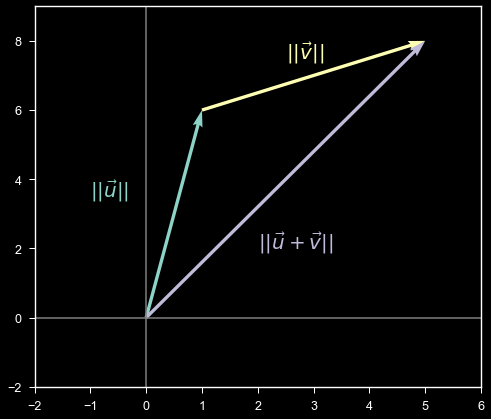

In [228]:
#plotting
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()


The shortest path between two points is a line.

The L1 norm <br/>
this norm is simply the sum of the absolute values:



In [217]:
# Manhattan distance 
u = np.array([-4, 3, 0, 2, -1, 5])

L1norm = 0

for i in range(len(u)):
    L1norm =  L1norm + u[i]

print("L1norm:\n",L1norm)

L1norm:
 5


The L2 norm<br/>
Graphically, the Euclidean norm corresponds to the length of the vector from the origin to the point obtained by linear combination (like applying Pythagorean theorem).


In [218]:
#Euclidean norm

u = np.array([-4, 3, 0, 2, -1, 5])
L2 = np.linalg.norm(u)

print("L2norm:\n",L2)

L2norm:
 7.416198487095663


(-2.0, 4.0)

(-2.0, 5.0)

Text(3.2, 4, '')

Text(3, -0.2, '')

Text(1, 2.5, '$\\vec{u}$')

Text(3.3, 2, '$\\vec{u}_y$')

Text(1.5, -1, '$\\vec{u}_x$')

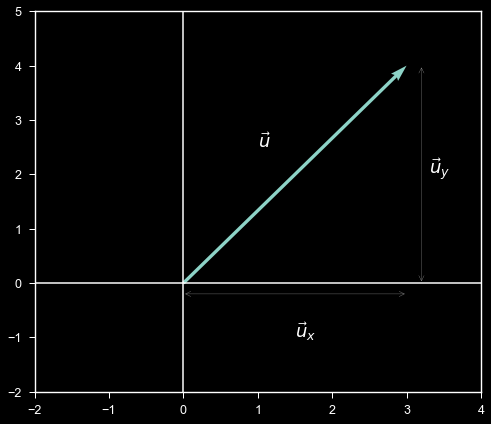

In [230]:
#another example for Graphical intution
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='white')
plt.axhline(y=0, color='white')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='red', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='blue', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.style.use('dark_background')
plt.show()

Cosine distance:<br/>
xT.y=∥x∥2⋅∥y∥2cosθ

(-2.0, 4.0)

(-2.0, 5.0)

Text(-0.5, 1, '$\\vec{x}$')

Text(1.5, 0.5, '$\\vec{y}$')

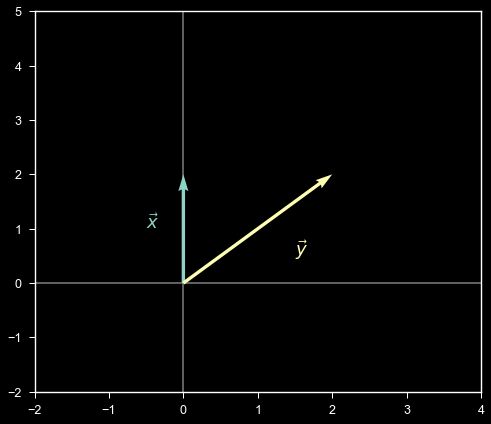

In [233]:
#cosine distance:
x = [0,0,0,2]
y = [0,0,2,2]

#plotting
plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1,color=sns.color_palette())

plt.text(-0.5, 1, r'$\vec{x}$',color=sns.color_palette()[0], size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', color=sns.color_palette()[1],size=18)

plt.show()

In [234]:
np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.000000000000001

### Orthonormal basis and Projection

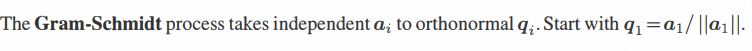

In [247]:
#grand-schmidt process

verySmallNumber = 10E-15
def gsBasis(A) :
    B = np.array(A, dtype=np.float_)
    for i in range(B.shape[1]) :
        for j in range(i) :
            B[:, i] = B[:,i] - B[:,i] @ B[:,j] * B[:,j]
        if np.linalg.norm(B[:, i]) > verySmallNumber :
            B[:, i] = B[:, i] / np.linalg.norm(B[:, i])  
        else :
            B[:, i] = np.zeros_like(B[:, i])
        
    return B

def dimensions(A) :
    return np.sum(np.linalg.norm(gsBasis(A), axis=0))


In [249]:
V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)
Z= gsBasis(V)
Z
dimensions(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

4.0

In [250]:
# Now let's see what happens when we have one vector that is a linear combination of the others.
C = np.array([[1,0,2],
              [0,1,-3],
              [1,0,2]], dtype=np.float_)
gsBasis(C)
dimensions(C)

array([[0.70710678, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.70710678, 0.        , 0.        ]])

2.0

In [254]:
x = np.array([[1,  0],
              [0, -6],
              [2,  2]])

y = np.array([1, 3, -3])

#projection of y onto the column space of X using the ordinary matrix expression:
py1 = x @ np.linalg.inv(x.T @ x) @ x.T @ y
print("Projection of y onto x:\n",py1)

#using grand-schimdt
U = gsBasis(x)
py2 = U @ U.T @ y

print("\nProjection of y onto x:\n",py2)

Projection of y onto X:
 [-0.56521739  3.26086957 -2.2173913 ]

Projection of y onto x:
 [-0.56521739  3.26086957 -2.2173913 ]


### Linear Transformation:

In [255]:
v = np.array([[6],[4]]) #v vector
v

Standard_basis = np.mat('1 0; 0 1')
Standard_basis

Transition_matrix = np.mat('2 0;0 2') #U basis
U = Transition_matrix
U

array([[6],
       [4]])

matrix([[1, 0],
        [0, 1]])

matrix([[2, 0],
        [0, 2]])

In [256]:
v_1 = U.I @ (Standard_basis @ v)
v_1

matrix([[3.],
        [2.]])

### Rotation:

In [270]:
v = np.array([[4],[2]]) #in standard basis
print("Inital Vector:\n",v)

#180 deg rotation
tra = np.mat("-1,0;0,-1")
# Tra = np.array([[-1,0],
#                 [0,-1]])

v_1 = tra.I @ (Standard_basis @ v)
print("\nVector after applying transforamtion:\n",v_1)

Inital Vector:
 [[4]
 [2]]

Vector after applying transforamtion:
 [[-4.]
 [-2.]]


(-6.0, 6.0)

(-6.0, 6.0)

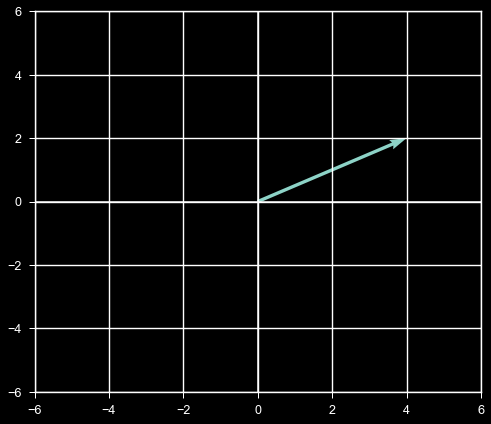

(-6.0, 6.0)

(-6.0, 6.0)

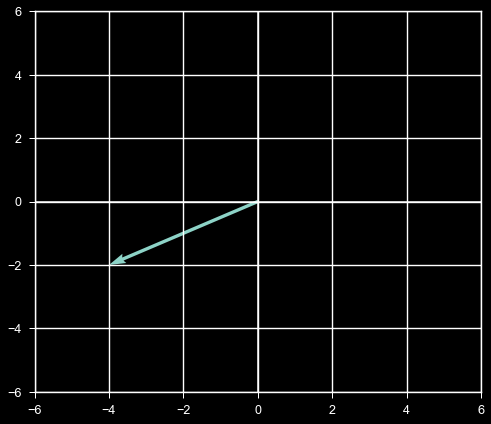

In [266]:
#plotting v vector
v = [0,0,4,2]

plt.quiver([v[0]],
           [v[1]],
           [v[2]],
           [v[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.axvline(x=0, color='white')
plt.axhline(y=0, color='white')
plt.show()


#ploting v_1 vector (after applying transforamtion)

v_1 = [0,0,-4,-2]

plt.quiver([v_1[0]],
           [v_1[1]],
           [v_1[2]],
           [v_1[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.axvline(x=0, color='white')
plt.axhline(y=0, color='white')
plt.show()

In [271]:
#90 degree rotation
v = np.array([[4],[2]]) #in standard basis 
print("Inital Vector:\n",v)

# G =  np.array([[0,-1],
#                [1,0]])
G = np.mat("0,-1;1,0")
v_1 = G.I @ (Standard_basis @ v)
print("\nVector after applying transforamtion:\n",v_1)

Inital Vector:
 [[4]
 [2]]

Vector after applying transforamtion:
 [[ 2.]
 [-4.]]


(-6.0, 6.0)

(-6.0, 6.0)

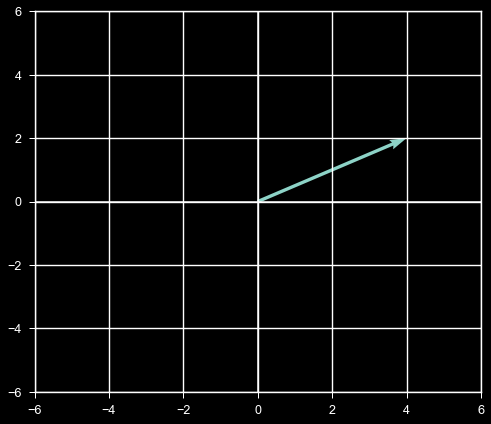

(-6.0, 6.0)

(-6.0, 6.0)

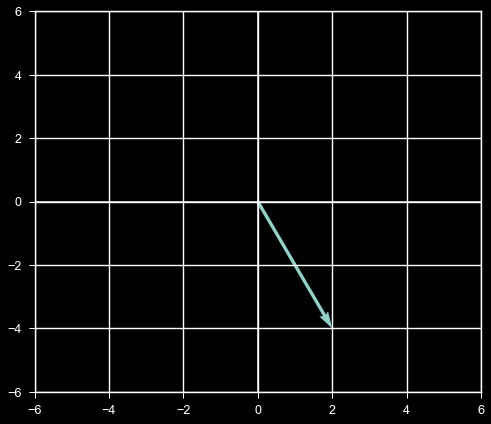

In [272]:
#plotting v vector
v = [0,0,4,2]

plt.quiver([v[0]],
           [v[1]],
           [v[2]],
           [v[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.axvline(x=0, color='white')
plt.axhline(y=0, color='white')
plt.show()


#ploting v_1 vector (after applying transforamtion)

v_1 = [0,0,2,-4]

plt.quiver([v_1[0]],
           [v_1[1]],
           [v_1[2]],
           [v_1[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.axvline(x=0, color='white')
plt.axhline(y=0, color='white')
plt.show()

## Matrix Decompostion:

### LU Decomposition 

In [297]:
#LU

A = sympy.Matrix([[6,-2,0],
                  [9,-1,1],
                  [3,7,5]])
    
L, U, _ = A.LUdecomposition()
print("Given matrix:\n")
A
print("LU Decomposition:")
print("\nLower Triangluar matrix:\n")
L

print("\nUpper Traingular matrix:\n")
U

Given matrix:



Matrix([
[6, -2, 0],
[9, -1, 1],
[3,  7, 5]])

LU Decomposition:

Lower Triangluar matrix:



Matrix([
[  1, 0, 0],
[3/2, 1, 0],
[1/2, 4, 1]])


Upper Traingular matrix:



Matrix([
[6, -2, 0],
[0,  2, 1],
[0,  0, 1]])

### Eigen vectors, Values and Decomposition

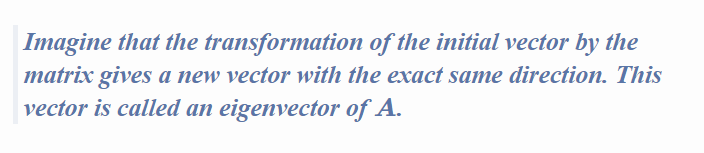

In [304]:
#code for plotting : from deeplearning book
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

Av=λv

In [312]:
A = np.array([[5, 1], [3, 3]])
A

v = np.array([[1], [1]])
v

array([[5, 1],
       [3, 3]])

array([[1],
       [1]])

(-1.0, 7.0)

(-1.0, 7.0)

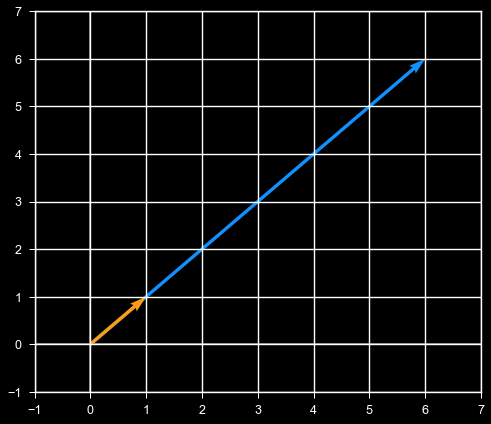

In [314]:
Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.grid()
plt.ylim(-1, 7)
plt.xlim(-1, 7)

array([[ 1],
       [-3]])

(-7.0, 1.0)

(-1.0, 3.0)

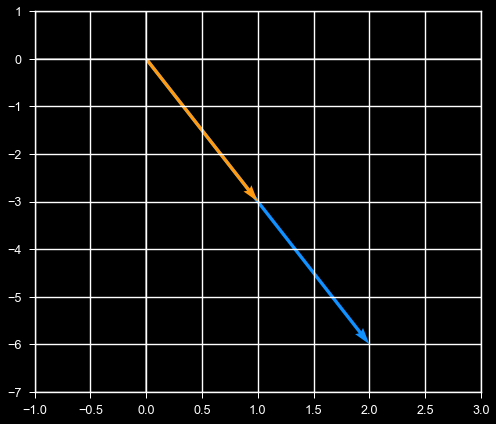

In [316]:
#another eigen vec
v = np.array([[1], [-3]])
v

Av = A.dot(v)

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.grid()
plt.ylim(-7, 1)
plt.xlim(-1, 3)

In [317]:
#finding eigen values and vecs of matrix A
Aval,Avecs = np.linalg.eig(A)

Aval

Avecs

array([6., 2.])

array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]])

#### Eigen decomposition

B=A⋅diag(λ)⋅A−1

In [322]:
A = np.array([[1, 1], [1, -3]])
A

A_inv = np.linalg.inv(V)
A_inv

array([[ 1,  1],
       [ 1, -3]])

array([[ 0.75,  0.25],
       [ 0.25, -0.25]])

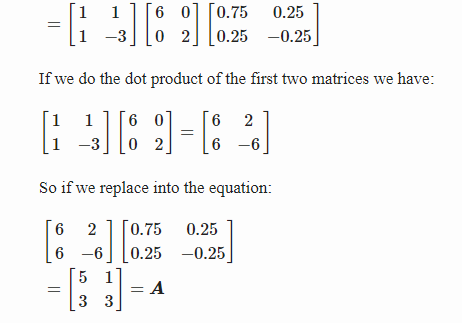

In [323]:
lambdas = np.diag([6, 2])
lambdas

array([[6, 0],
       [0, 2]])

In [325]:
A.dot(lambdas).dot(A_inv)

array([[5., 1.],
       [3., 3.]])

#### Real Symmetric Matrix:

A=QΛQT

In [326]:
A = np.array([[6, 2], [2, 3]])
A

array([[6, 2],
       [2, 3]])

In [327]:
AVals, AVecs = np.linalg.eig(A)
AVecs

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [329]:
AVals = np.diag(AVals)
AVals

array([[7., 0.],
       [0., 2.]])

In [332]:
#verification A=QΛQT
A

AVecs.dot(AVals).dot(AVecs.T)

array([[6, 2],
       [2, 3]])

array([[6., 2.],
       [2., 3.]])

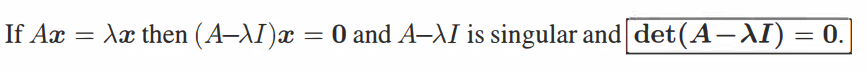

In [298]:
#verification fn
def verify(l,M):
    """Verifies whether the given value(l) is a eigen value of the matrix(M)
        arguments: l -> eigen vector
                   M -> Matrix."""
    I = np.identity(len(l))
    for i in range(len(l)):
        if round(np.linalg.det(M-(l[i]*I)),2) == 0:
            print("%d is a eigen value for the matrix \n%s" %(l[i], M))
        else:
            print("Not an eigen value.")

Compute the Eigen Values and vectors for the following matrices and verfiy it.
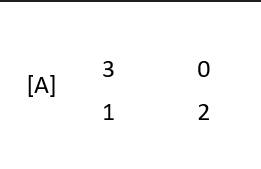

In [299]:
#Computation
A = np.array([[3,0],
              [1,2]])
Avals , Avecs = np.linalg.eig(A)

Avals

Avecs

array([2., 3.])

array([[0.        , 0.70710678],
       [1.        , 0.70710678]])

In [300]:
#verification
verify(Avals,A)

2 is a eigen value for the matrix 
[[3 0]
 [1 2]]
3 is a eigen value for the matrix 
[[3 0]
 [1 2]]


Problem 2:

In [301]:
#Computation
B = np.array([[7, 3],
              [3, -1]])
Bvals , Bvecs = np.linalg.eig(B)

Bvals

Bvecs

array([ 8., -2.])

array([[ 0.9486833 , -0.31622777],
       [ 0.31622777,  0.9486833 ]])

In [302]:
verify(Bvals,B)

8 is a eigen value for the matrix 
[[ 7  3]
 [ 3 -1]]
-2 is a eigen value for the matrix 
[[ 7  3]
 [ 3 -1]]


In [303]:
#orthogonality
v1 = Bvecs[:,0]
v1 
v2 = Bvecs[:,1]
v2
v1 @ v2

array([0.9486833 , 0.31622777])

array([-0.31622777,  0.9486833 ])

0.0